# Examples of the `interp` submodule

In [1]:
from narcpack.interp import Rbf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Radial basis functions

In [41]:
classes = [Rbf]
functions = ['multiquadric','inverse multiquadric','inverse quadratic','gaussian','linear','cubic','quintic']
ls = ['tab:blue','tab:orange','tab:red','tab:brown','tab:pink','tab:gray','tab:cyan']

In [42]:
def make_Rbf_plots(g, n=10, interval=[-1,1], rand=False):
    fig, ax = plt.subplots(1,2,figsize=[12,4])
    if rand:
        x = np.random.uniform(interval[0],interval[1],n)
    else:
        x = np.linspace(interval[0],interval[1],n)
    xfine = np.linspace(interval[0],interval[1],1000)
    ax[0].plot(xfine,g(xfine),'--k',label='True')
    for i, function in enumerate(functions):
        a = Rbf(x, g(x), function=function)
        ax[0].plot(xfine,a(xfine),ls[i],label=function)
        ax[0].plot(x, g(x), 'o')
        ax[1].plot(xfine,np.abs(a(xfine)-g(xfine)),ls[i])
    fig.legend()

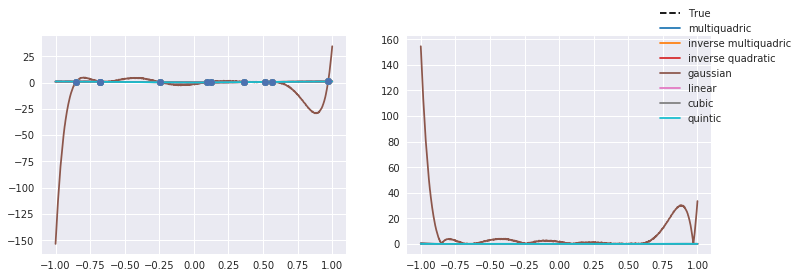

In [45]:
make_Rbf_plots(lambda x : np.abs(x), n=10, rand=True)

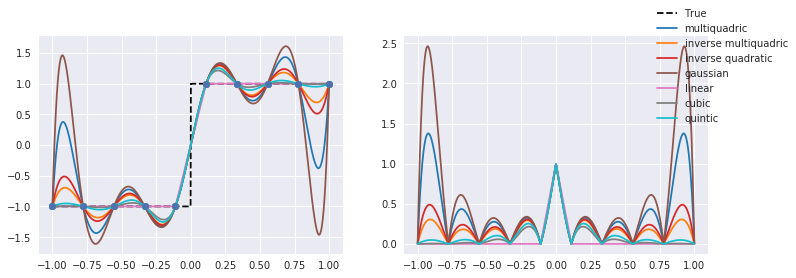

In [46]:
make_Rbf_plots(lambda x : np.sign(x), n=10, rand=False)

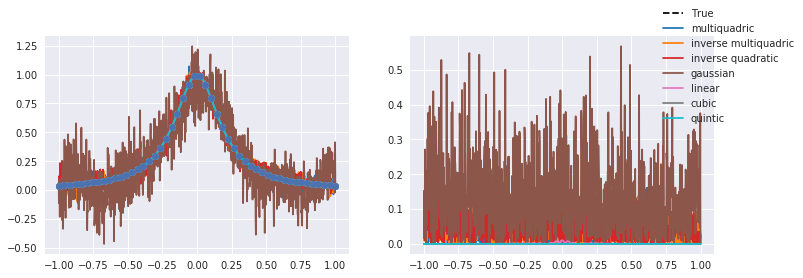

In [47]:
make_Rbf_plots(lambda x : 1.0/(1.0+25.0*x**2), n=50, rand=False)

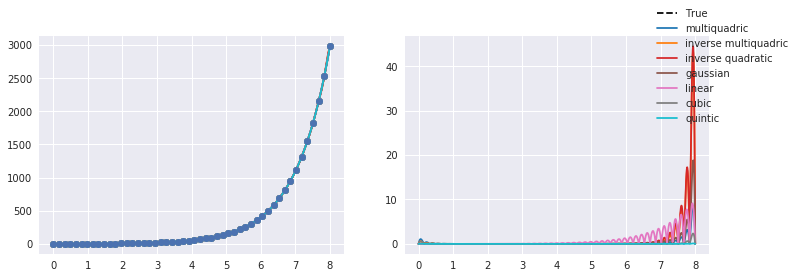

In [48]:
make_Rbf_plots(lambda x : np.exp(x), interval=[0,8], n=50, rand=False)

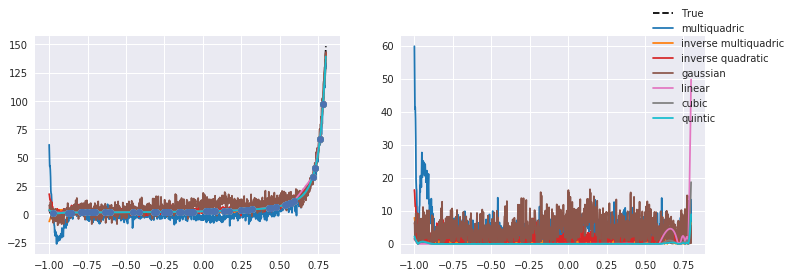

In [49]:
make_Rbf_plots(lambda x : np.exp(1.0/(1.0-x)), interval=[-1,0.8], n=50, rand=True)